In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os


# 딥러닝
import tensorflow as tf

# 딥러닝 모델 구조를 정의하는 것
from tensorflow.keras.models import Sequential
# 층구조를 정의하는 것
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 것
from tensorflow.keras.layers import Activation
# Convolutional Layer 
# 합성곱을 수행하는 레이어
# Convolutionla Layer 를 사용하는 신경망을 CNN이라고 부른다.
# 커널에 설정되어 있는 가중치 값에 따라서 특정 부분의 값을 낮추고 특정 부분의 값을 키워서
# 특성이 잘 드러나게 하는 역할을 수행한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling
# Convolutional Layer를 통과한 데이터에서 큰 부분만 취하는 역할을 수행한다.
# 필요한 특성을 나타내는 부분을 취하고 나머지는 버리는 효과를 얻게 된다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# 다차원의 데이터를 1차원 데이터로 변환시켜준다.
# 선형회귀 레이어로 가기전에 두어야 한다.
from tensorflow.keras.layers import Flatten
# Dropout : 데이터 하나가 들어오면 레이어의 모든 노드가 그 데이터를 학습하게 된다.
# 그렇기 때문에 모든 가중치 값이 데이터에 영향을 받아서 변경된다.
# 만약 각 노드들이 특정 패턴의 데이터만 학습하고자 한다면 학습시 일부 노드들을 비활성화 시켜서
# 학습에 참여시키지 않게 할 수 있다.
# 전체 데이터에 대해 모든 노드들이 과접합을 되는 것을 예방한다.
from tensorflow.keras.layers import Dropout
# Embedding : 주어진 단어 데이터를 통해 단어 벡터를 생성하는 레이어
# 생성한 벡터 공간의 차원을 매개변수로 받는다.
# 주어진 문장 데이터의 단어 개수가 공간의 차원을 넘어서면 출현 빈도수가 높은 단어들로만
# 구성하여 공간 벡터를 구성한다.
from tensorflow.keras.layers import Embedding
# LSTM : RNN 용 Layer
# 이전에 입력된 데이터와 함께 묶어서 학습할 데이터를 생성하는 방식으로 동작하는 레이어
# 순환신경망. 문장 데이터, 주식시세, 시계열 데이터 등의 데이터 패턴을 보고 다음 데이터를
# 예측하는데 사용한다.
# LSTM은 Long Term Memory와 Short Term Memory를 두어 데이터의 패턴이 좀더 다양하게 생성될 수 
# 있도록 하는 특징을 가지고 있다.
from tensorflow.keras.layers import LSTM

# GAN
# GAN에서 사용하는 활성화 함수
from tensorflow.keras.layers import LeakyReLU
# 레이어를 통과한 데이터를 다시 표준화하여 학습 효율성을 높히게 한다.
from tensorflow.keras.layers import BatchNormalization
# 레이어를 통과한 데이터의 차원을 변경하기위 사용한다.
from tensorflow.keras.layers import Reshape
# 데이터 업샘플링 - Convolutional Layer가 데이터의 크기를 줄이므로 늘리는 것이 필요하다
from tensorflow.keras.layers import UpSampling2D
# 입력층
from tensorflow.keras.layers import Input
# 딥러닝 모델, GAN은 생성자 신경망과 판별자 신경망을 같이 써야 하기 때문에
# 이 둘을 하나의 신경망으로 합치기 위해 사용한다.
from tensorflow.keras.models import Model

# 다중 분류를 위한 원핫 인코딩
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델 복원
from tensorflow.keras.models import load_model

# epoch마다 모델을 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
# 조기 중단
from tensorflow.keras.callbacks import EarlyStopping

# 경사하강법
from tensorflow.keras.optimizers import Adam

# 문자열을 잘라낸다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터 수를 동일하게 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 단어 사전으로 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전이 학습을 위한 사전 학습 모델
from tensorflow.keras.applications import VGG16

# 이미지 데이터를 불러올 때 나눠서 읽어오거나 읽어올때 이미지 데이터를 가공하면서
# 가져울 수 있는 도구
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 출력한 것을 청소하는 함수
from IPython.display import clear_output
# 시간 관련
import time

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면..
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

#### 가설1. 등급이 높을수록 매달 입금되는 금액이 많을 것이다

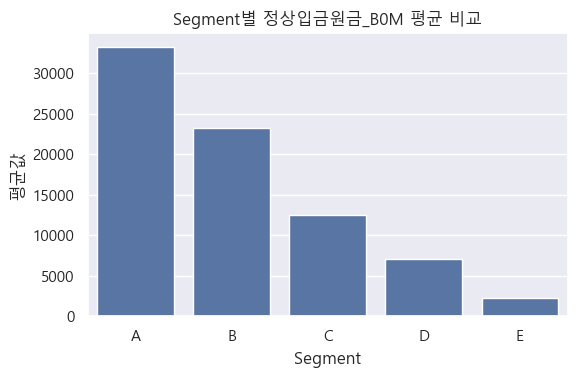

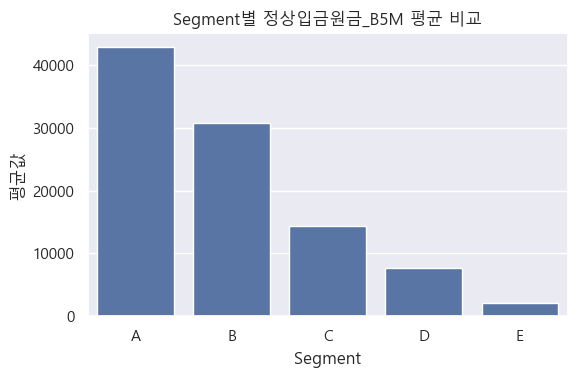

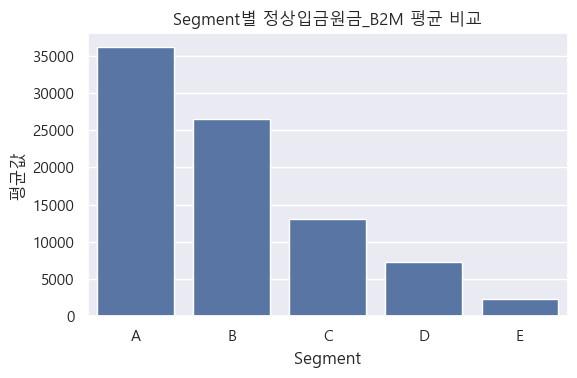

In [10]:
# 1. 사용할 컬럼 지정
columns_il = [ '정상입금원금_B0M', '정상입금원금_B5M', '정상입금원금_B2M']

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_sales = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_il)

# 3. 데이터 병합
df = pd.merge(df_member, df_sales, on='ID', how='left')

# 4. 세그먼트별 평균 계산
df_grouped = df.groupby('Segment')[columns_il].mean().reset_index()

# 5. 시각화
for col in columns_il:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Segment', y=col, data=df_grouped)
    plt.title(f'Segment별 {col} 평균 비교')
    plt.xlabel('Segment')
    plt.ylabel('평균값')
    plt.tight_layout()
    plt.show()


#### 가설 2. 등급이 높을수록 일시불로 물건을 구매하는 금액이 더 클 것이다.

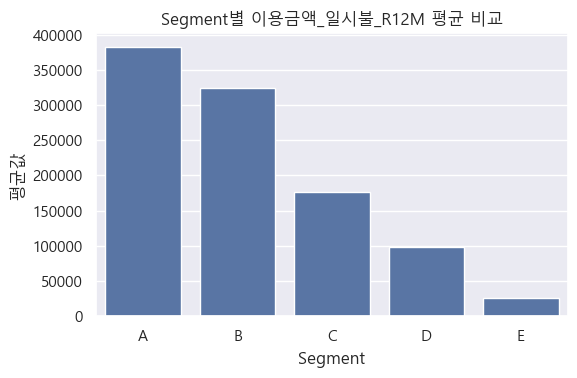

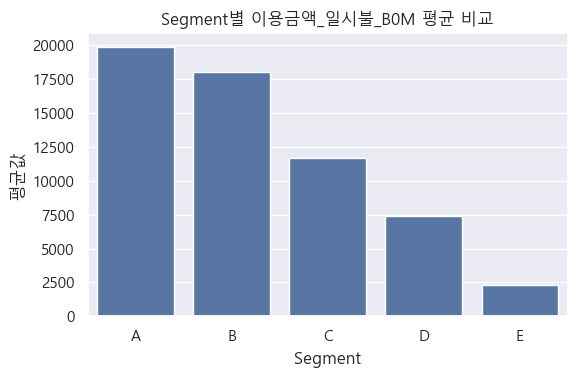

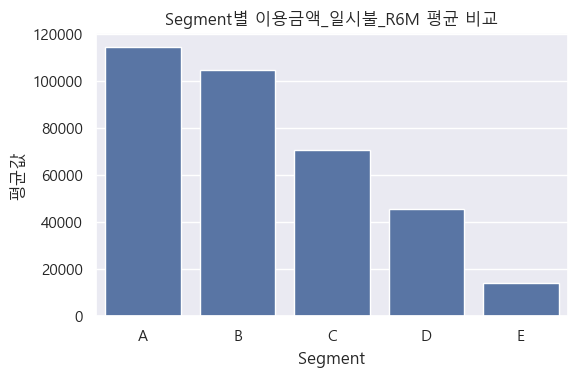

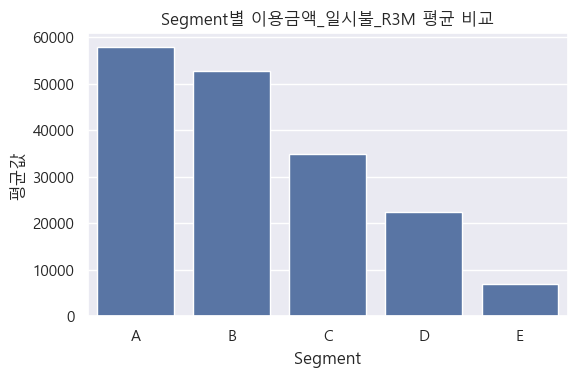

In [13]:
# 1. 사용할 컬럼 지정
columns_il = [ '이용금액_일시불_R12M', '이용금액_일시불_B0M', '이용금액_일시불_R6M', '이용금액_일시불_R3M']

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_sales = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_il)

# 3. 데이터 병합
df = pd.merge(df_member, df_sales, on='ID', how='left')

# 4. 세그먼트별 평균 계산
df_grouped = df.groupby('Segment')[columns_il].mean().reset_index()

# 5. 시각화
for col in columns_il:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Segment', y=col, data=df_grouped)
    plt.title(f'Segment별 {col} 평균 비교')
    plt.xlabel('Segment')
    plt.ylabel('평균값')
    plt.tight_layout()
    plt.show()


#### 가설 3. 등급이 높을수록 많은 결제를 할 것이니 매달 청구되는 금액이 많을 것이다. 

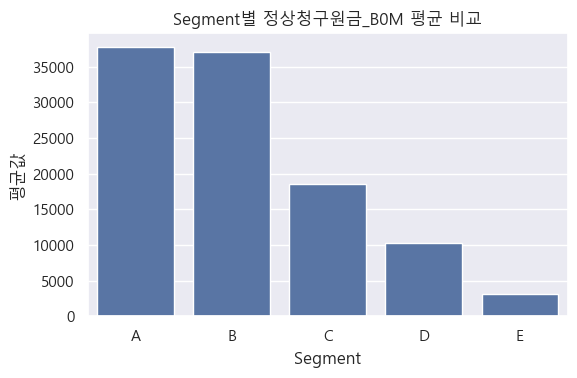

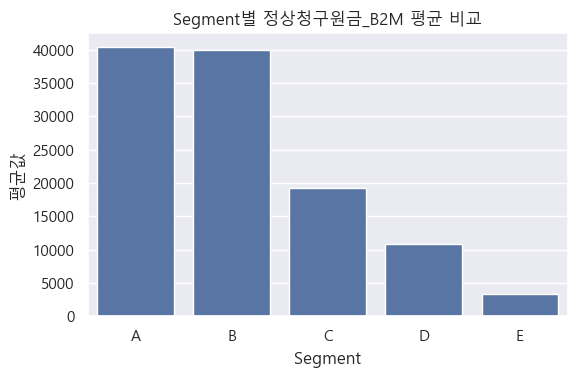

In [16]:
# 1. 사용할 컬럼 지정
columns_il = [ '정상청구원금_B0M', '정상청구원금_B2M']

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_sales = pd.read_parquet('open/train/3.승인매출정보', columns=['ID'] + columns_il)

# 3. 데이터 병합
df = pd.merge(df_member, df_sales, on='ID', how='left')

# 4. 세그먼트별 평균 계산
df_grouped = df.groupby('Segment')[columns_il].mean().reset_index()

# 5. 시각화
for col in columns_il:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Segment', y=col, data=df_grouped)
    plt.title(f'Segment별 {col} 평균 비교')
    plt.xlabel('Segment')
    plt.ylabel('평균값')
    plt.tight_layout()
    plt.show()


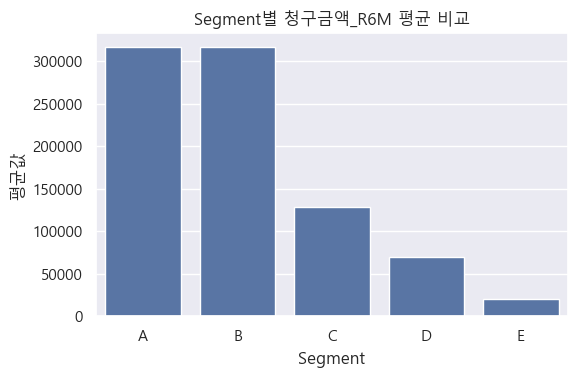

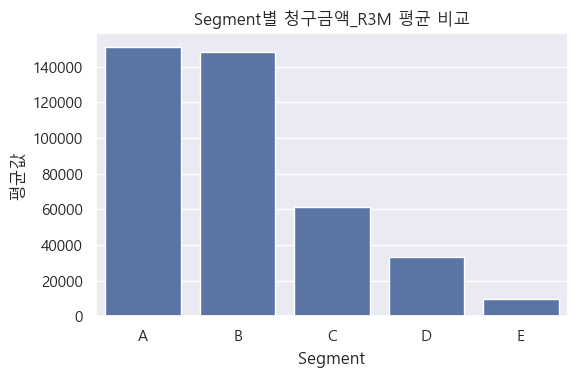

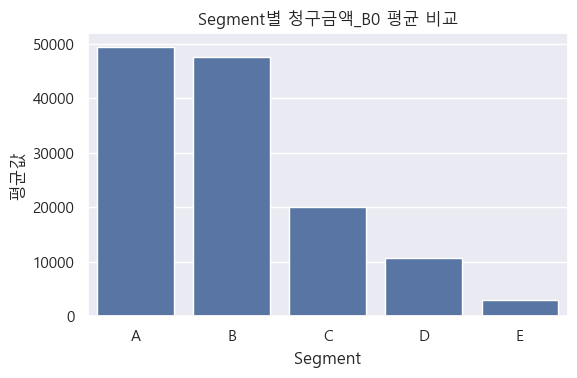

In [20]:
# 1. 사용할 컬럼 지정
columns_il = [ '청구금액_R6M', '청구금액_R3M', '청구금액_B0']

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=['ID', 'Segment'])
df_sales = pd.read_parquet('open/train/4.청구입금정보', columns=['ID'] + columns_il)

# 3. 데이터 병합
df = pd.merge(df_member, df_sales, on='ID', how='left')

# 4. 세그먼트별 평균 계산
df_grouped = df.groupby('Segment')[columns_il].mean().reset_index()

# 5. 시각화
for col in columns_il:
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Segment', y=col, data=df_grouped)
    plt.title(f'Segment별 {col} 평균 비교')
    plt.xlabel('Segment')
    plt.ylabel('평균값')
    plt.tight_layout()
    plt.show()

### 가설 5. 등급이 높을수록 많은 금액을 빌리고, 많은 금액을 갚을 것이다.

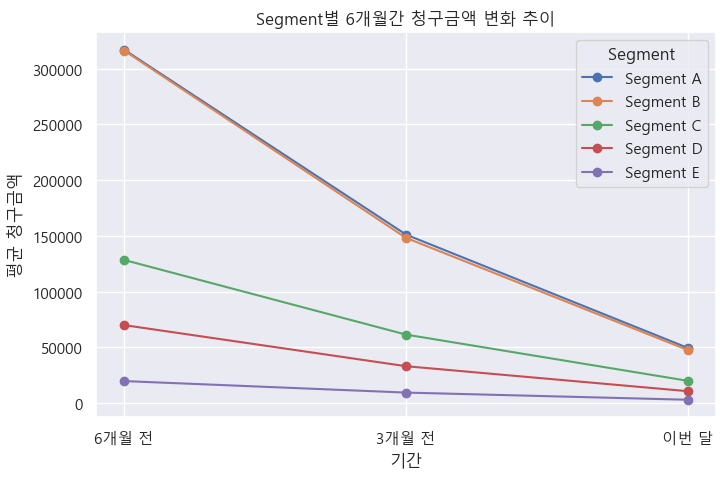

In [27]:
# 1. 분석에 사용할 컬럼
segment_col = ['ID', 'Segment']
billing_cols = ['ID', '청구금액_B0', '청구금액_R3M', '청구금액_R6M']

# 2. 데이터 불러오기
df_member = pd.read_parquet('open/train/1.회원정보', columns=segment_col)
df_billing = pd.read_parquet('open/train/4.청구입금정보', columns=billing_cols)

# 3. ID 기준 병합
df = pd.merge(df_member, df_billing, on='ID', how='left')

# 4. 세그먼트별 6개월간 청구금액 평균 계산 (기간 순서 유지)
period_cols = ['청구금액_R6M', '청구금액_R3M', '청구금액_B0']
df_grouped = df.groupby('Segment')[period_cols].mean()

# 5. 꺾은선 그래프 그리기
plt.figure(figsize=(8,5))
for seg in sorted(df_grouped.index):
    plt.plot(['6개월 전', '3개월 전', '이번 달'], df_grouped.loc[seg], marker='o', label=f'Segment {seg}')

plt.title('Segment별 6개월간 청구금액 변화 추이')
plt.xlabel('기간')
plt.ylabel('평균 청구금액')
plt.legend(title='Segment')
plt.grid(True)
plt.show()

- A등급의 사람들과 B등급의 사람들이 많은 금액을 빌리고, 그만큼 많은 금액을 잘 갚는다.

### 각 세그먼트 별 특성을 파악한다

In [ ]:
# 1) 필요한 컬럼 지정
member_cols = ['ID', 'Segment']  # 1.회원정보
billing_cols = ['ID', '청구금액_R6M', '청구금액_R3M', '청구금액_B0']  # 4.청구입금정보
approval_cols = ['ID', '정상입금원금_B0M', '정상입금원금_B5M',
                 '연체입금원금_B0M', '이용건수_일시불_B0M', '이용금액_일시불_R3M']  # 3.승인매출정보

# 2) 파일 경로 설정 (환경에 맞게 수정)
path_member = 'open/train/1.회원정보'
path_billing = 'open/train/4.청구입금정보'
path_approval = 'open/train/3.승인매출정보'

# 3) 데이터 불러오기 (필요한 컬럼만)
df_member = pd.read_parquet(path_member, columns=member_cols)
df_billing = pd.read_parquet(path_billing, columns=billing_cols)
df_approval = pd.read_parquet(path_approval, columns=approval_cols)

# 4) 병합 (ID 기준)
df = df_member.merge(df_billing, on='ID', how='left').merge(df_approval, on='ID', how='left')

# 5) 프로파일링 변수 리스트
vars_to_profile = ['청구금액_R6M', '청구금액_R3M', '청구금액_B0',
                   '정상입금원금_B0M', '정상입금원금_B5M',
                   '연체입금원금_B0M', '이용건수_일시불_B0M', '이용금액_일시불_R3M']

# 6) 세그먼트별 기술통계량 출력
profile_stats = df.groupby('Segment')[vars_to_profile].agg(['mean', 'median', 'std', 'min', 'max'])
print(profile_stats)

# 7) 박스플롯 시각화
plt.figure(figsize=(15, 10))
for i, var in enumerate(vars_to_profile):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Segment', y=var, data=df)
    plt.title(f'Segment별 {var} 분포')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

              청구금액_R6M                                           \
                  mean    median            std    min      max   
Segment                                                           
A        316939.458848  294936.0  142987.014518  12056  1112355   
B        316174.256944  305692.0  150390.459763  52478   944773   
C        128408.240129  115177.0   92339.913665      0  1112355   
D         69963.942264   59813.0   54680.426470      0  1027904   
E         19778.687382   10091.0   28105.152625      0   885054   

              청구금액_R3M                                         ...  \
                  mean    median           std    min     max  ...   
Segment                                                        ...   
A        151168.328189  139468.5  70214.062763   7472  508110  ...   
B        148207.687500  140071.0  72746.110756  28996  472637  ...   
C         61462.174896   54892.0  45109.804225      0  532261  ...   
D         33112.578759   28006.5  26644.222